In [1]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from cuml.manifold import TSNE as cumlTSNE
from sklearn.preprocessing import StandardScaler
from cuml.manifold.umap import UMAP as cumlUMAP
import numpy as np
import seaborn as sns
import shutil
import pandas 
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
dataFile = open("../Dataframes/SquaredWeightedMatrix_V2.pkl", 'rb')
df = pickle.load(dataFile)
sentences = df['sentence'].to_numpy()
df = df.drop('sentence', axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.010662,-0.035473,-0.025611,0.012773,0.012705,-0.013702,-0.044721,-0.014689,0.008079,-0.019715,...,0.000213,0.007823,0.009612,-0.000590,0.053429,-0.004752,0.020467,-0.002624,-0.002532,0.004103
1,0.032876,-0.064865,0.002555,-0.024485,-0.038841,-0.059541,-0.050490,-0.019825,0.020571,0.081838,...,-0.081816,-0.052465,-0.076624,0.079542,-0.027362,0.025651,0.030915,-0.055276,-0.012482,-0.054227
2,-0.012443,-0.043223,0.003684,0.061463,0.061439,-0.020868,-0.003319,0.026243,0.000578,0.015451,...,-0.050059,-0.019349,0.005958,-0.031995,0.003124,-0.018602,0.051105,-0.035655,-0.003563,0.010372
3,-0.010030,-0.037978,-0.011218,0.008807,-0.021877,0.023408,-0.046795,-0.021728,0.020444,0.041620,...,-0.036526,-0.008280,-0.061070,0.056864,0.017233,0.017288,-0.024562,-0.033899,0.006795,-0.014894
4,-0.012179,-0.042267,-0.005794,-0.008853,0.028347,0.017203,0.012331,-0.025404,-0.001078,0.013851,...,-0.037676,-0.006599,-0.029074,0.009095,0.009272,0.006182,0.036618,-0.062798,0.040195,-0.012385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328174,0.026335,0.020373,0.014832,-0.034999,-0.063762,0.050719,-0.014787,-0.045425,0.006275,0.061068,...,-0.122978,0.027188,-0.071143,0.035290,0.036733,-0.004520,-0.076438,0.007928,0.011149,0.002426
2328175,-0.025625,-0.002937,0.047254,-0.018320,-0.026607,0.047867,0.075852,-0.009191,0.034472,-0.009027,...,-0.040321,-0.032845,0.000307,0.035450,-0.041924,-0.019874,0.047281,-0.051015,0.019052,0.014368
2328176,0.083419,0.107829,0.048048,-0.006419,0.012844,0.000735,0.047308,-0.020474,-0.059422,-0.040704,...,0.037175,-0.079425,-0.052241,0.014160,-0.038610,0.025602,0.034606,-0.122390,0.032792,-0.012604
2328177,0.049879,-0.024188,-0.006114,0.106212,-0.125119,0.037542,-0.021974,0.033815,0.054945,0.047913,...,-0.031136,-0.074802,0.004342,-0.007249,-0.028693,0.123375,0.053106,-0.067641,0.000954,-0.058904


In [3]:
sentences

array(['the gentleman i spoke with at lindbergh twr over the phone was very polite and seemed to be primarily concerned with the sudden surprise of my presence in his ata',
       '""approx 5 mi nw of the mission bay vor", while at an alt of approx 500\' over san, i proceeded to contact san apch ctl on the freq depicted on my current san tca chart',
       'w/o hesitation i quickly changed freqs to find the same routine with this next ctlr',
       ...,
       'on the digital atis," they need to clearly tell crews which approach to expect',
       '""multiple aircraft have landed over multiple years on 122.95 which is an fbo frequency on the field',
       'it is listed on the sectional as the first frequency'],
      dtype=object)

In [4]:
# matrix = df.head(150000).to_numpy()
matrix = df.to_numpy()
# data_2d = TSNE(n_components=2, perplexity=5, n_jobs=-1, verbose=1).fit_transform(matrix)
data_2d = cumlTSNE(n_components=2, method='barnes_hut').fit_transform(matrix)
# data_2d = cumlUMAP(n_neighbors=40, init="spectral").fit_transform(data_2d)
data_2d = StandardScaler().fit_transform(data_2d)

[W] [13:11:12.523422] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


In [5]:
data_2d

array([[-1.1607233 ,  1.2409781 ],
       [-0.55952305,  1.689396  ],
       [-0.43608648,  1.1933676 ],
       ...,
       [-0.81234133,  0.92630637],
       [-0.7578742 ,  0.9575951 ],
       [-0.40575913,  0.5219643 ]], dtype=float32)

In [ ]:
from sklearn.neighbors import NearestNeighbors
 
neighbors = NearestNeighbors(n_neighbors=150)
neighbors_fit = neighbors.fit(data_2d)
distances, indices = neighbors_fit.kneighbors(data_2d)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
clustering = DBSCAN(eps=0.0564, min_samples=150, n_jobs=-1).fit_predict(data_2d)

In [604]:
labels = np.ndarray.tolist(clustering)
for i in np.unique(labels):
    print(str(i) + ": "+ str(labels.count(i)))

-1: 28976
0: 22821
1: 1030
2: 839
3: 393
4: 813
5: 1021
6: 18169
7: 580
8: 259
9: 343
10: 4654
11: 1111
12: 5535
13: 2055
14: 1328
15: 148
16: 983
17: 624
18: 588
19: 4232
20: 1378
21: 408
22: 469
23: 1661
24: 554
25: 691
26: 3979
27: 808
28: 860
29: 1605
30: 3196
31: 1430
32: 2122
33: 1456
34: 2298
35: 673
36: 721
37: 724
38: 877
39: 344
40: 574
41: 187
42: 3571
43: 161
44: 608
45: 488
46: 788
47: 290
48: 411
49: 855
50: 396
51: 1076
52: 289
53: 417
54: 605
55: 999
56: 973
57: 441
58: 483
59: 885
60: 1350
61: 312
62: 304
63: 189
64: 750
65: 841
66: 435
67: 1017
68: 696
69: 384
70: 208
71: 290
72: 355
73: 316
74: 438
75: 716
76: 360
77: 217
78: 168
79: 252
80: 209
81: 160
82: 185
83: 284
84: 453
85: 197
86: 186
87: 185
88: 382
89: 106
90: 279
91: 170
92: 174
93: 91
94: 88


In [607]:
silhouette_score(matrix, clustering, sample_size=15000, random_state=123)

-0.10210914227049737

In [80]:
for index,value in enumerate(labels):
    if value == 846:
        print(sentences[index] + '\n')

""on short final (400' agl) we noticed an acft clred for tkof on rwy 18", which intersects rwy 10," the rwy we were clred to land on

acft ready for dep off rwy 14, waiting acft to cross intxn lndg rwy 28

""i", flying sma x, was clred to land on rwy 17 and hold short of a xing rwy 4

""mlg x landed rwy 9r and was told to hold short of rwy 9l at dixie

as lgt z clred the rwy, i told hvt x to cross rwy 26r

""the smt x was told to make a short apch to rwy 18 because of tfc on a 5 mi final to rwy 23

i stated i was on short final for rwy 1

holding short of rwy 25r an lgt ahead of us was clred to taxi across rwy 25r and hold short of rwy 25l

they advised me of departing acft on rwy 24, and clred me for a left downwind to rwy 33

i told him we did not have the rwy in sight, and he stated that he would turn up the intensity on the rwy lights, and clred us to land on rwy 11l

i asked whether he could land on rwy 18 to hold short of rwy 24 for lndg tfc

this i did while taxiing to the activ

In [611]:
def save_clusters(labels, sentences): 
    for index,value in enumerate(labels):
        if(value != -1):
            filename = "../DBSCAN_Clusters_150K/Cluster" + str(value) + ".txt"
            out = open(filename, 'a')
            out.write(sentences[index] + '\n\n')
            out.close()

In [612]:
try:
    os.mkdir('../DBSCAN_Clusters_150K')
except:
    shutil.rmtree('../DBSCAN_Clusters_150K')
    os.mkdir('../DBSCAN_Clusters_150K')
clusters = save_clusters(labels, sentences)

In [608]:
# plt.rcParams['axes.facecolor'] = (0.78, 0.95, 0.61)
plt.rcParams['axes.facecolor'] = (0, 0, 0)
plt.rcParams['axes.grid'] = False

In [609]:
data_2d_display = data_2d.tolist()
drop_indexes = []
for i in range(len(data_2d)):
    if labels[i] == -1: drop_indexes.append(i)
    data_2d_display[i].append(labels[i])
data_2d_display = pandas.DataFrame(data_2d_display, columns=['x', 'y', 'cluster',])
data_2d_display = data_2d_display.drop(drop_indexes)


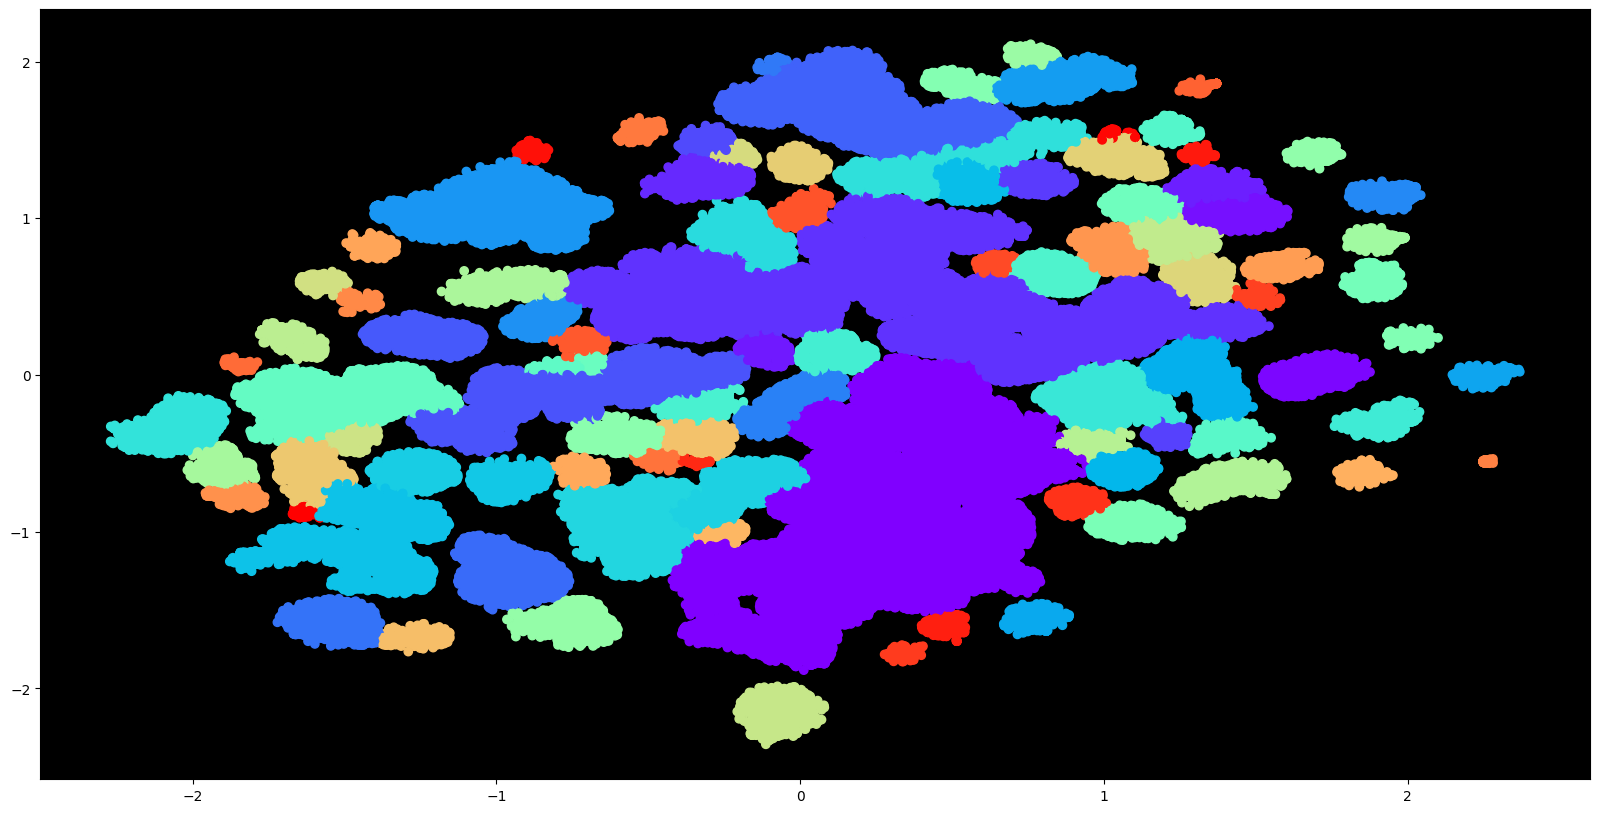

In [610]:
plt.figure(figsize=(20, 10))
plt.scatter(data_2d_display['x'], data_2d_display['y'], c=data_2d_display['cluster'], cmap='rainbow')
plt.savefig('../Visualizations/150K_DBSCAN_Head.png')